In [1]:
pip install pandas scikit-learn matplotlib seaborn xgboost 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd


df = pd.read_csv("osteoporosis.csv")


print(df.head())


       Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0  104866   69  Female           Normal            Yes             Asian   
1  101999   32  Female           Normal            Yes             Asian   
2  106567   89  Female   Postmenopausal             No         Caucasian   
3  102316   78  Female           Normal             No         Caucasian   
4  101944   38    Male   Postmenopausal            Yes  African American   

   Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0  Underweight            Low       Sufficient         Sedentary     Yes   
1  Underweight            Low       Sufficient         Sedentary      No   
2       Normal       Adequate       Sufficient            Active      No   
3  Underweight       Adequate     Insufficient         Sedentary     Yes   
4       Normal            Low       Sufficient            Active     Yes   

  Alcohol Consumption    Medical Conditions      Medications Prior Fractures  \
0     

In [3]:
df.describe

<bound method NDFrame.describe of           Id  Age  Gender Hormonal Changes Family History    Race/Ethnicity  \
0     104866   69  Female           Normal            Yes             Asian   
1     101999   32  Female           Normal            Yes             Asian   
2     106567   89  Female   Postmenopausal             No         Caucasian   
3     102316   78  Female           Normal             No         Caucasian   
4     101944   38    Male   Postmenopausal            Yes  African American   
...      ...  ...     ...              ...            ...               ...   
1953  106130   19  Female           Normal            Yes  African American   
1954  106463   23  Female   Postmenopausal            Yes         Caucasian   
1955  103142   34  Female   Postmenopausal             No  African American   
1956  105187   25    Male   Postmenopausal             No  African American   
1957  108561   26  Female   Postmenopausal             No  African American   

      Body Weight

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

### 1. Data cleaning

In [5]:
print(df.isnull().sum())

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [6]:
df['Alcohol Consumption'].unique()

array(['Moderate', nan], dtype=object)

In [7]:
# Replacing missing values of Alcohol Consumption based on Smoking habit(according to www.ncbi.nlm.nih.gov, more than 85 percent of smokers drink alcohol)
df.loc[df['Smoking'] == 'Yes', 'Alcohol Consumption'] = df.loc[df['Smoking'] == 'Yes', 'Alcohol Consumption'].fillna('Moderate')
df.loc[df['Smoking'] == 'No', 'Alcohol Consumption'] = df.loc[df['Smoking'] == 'No', 'Alcohol Consumption'].fillna('No')


In [8]:
print(df.isnull().sum())

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption      0
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [9]:
df['Alcohol Consumption'].unique()

array(['Moderate', 'No'], dtype=object)

In [10]:
df['Medical Conditions'].unique()

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

In [11]:
df['Medications'].unique()

array(['Corticosteroids', nan], dtype=object)

In [12]:
hyperthyroid_corticosteroids = df[(df['Medical Conditions'] == 'Hyperthyroidism') & (df['Medications'] == 'Corticosteroids')]
num_rows = len(hyperthyroid_corticosteroids)
print(num_rows)

336


In [13]:
#replacing NaN values in the 'Medical Conditions' and 'Medications' columns with "unknown" 
df['Medical Conditions'].fillna('Unknown', inplace=True)
df['Medications'].fillna('Unknown', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\3943233090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medical Conditions'].fillna('Unknown', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5128\3943233090.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [14]:
print(df.isnull().sum())

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


In [15]:
df['Race/Ethnicity'].unique()

array(['Asian', 'Caucasian', 'African American'], dtype=object)

In [16]:
#dropping the column Race/Ethnicity,because it is not inclusive
df.drop(columns=['Race/Ethnicity'], inplace=True)


In [17]:
df.duplicated().sum()

0

### 2.EDA

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Osteoporosis'}>]], dtype=object)

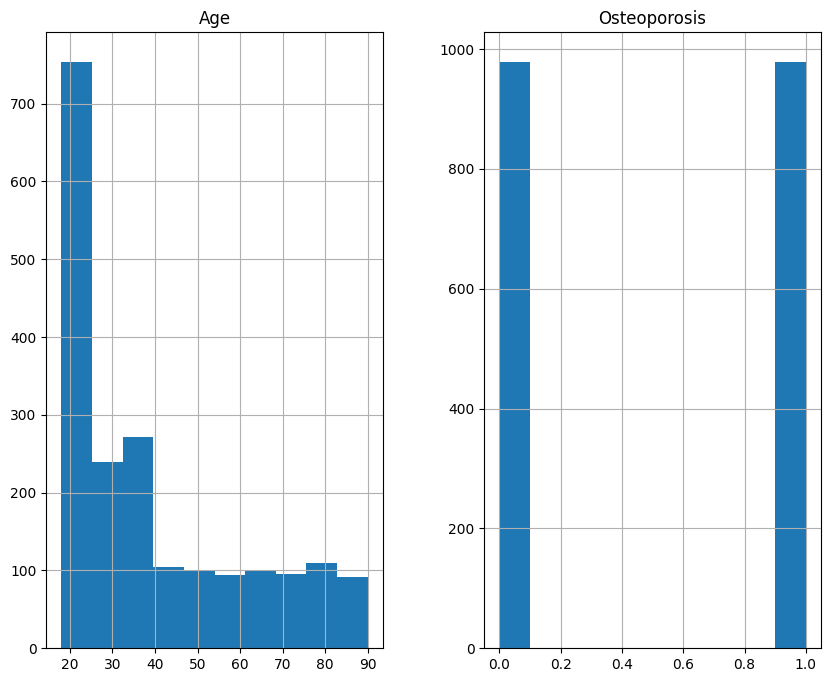

In [18]:

import numpy as np

numerical_columns = df.drop(columns=['Id']).select_dtypes(include=[np.number]).columns

df[numerical_columns].hist(figsize=(10, 8))


In [19]:
df['Age'].describe()

count    1958.000000
mean       39.101124
std        21.355424
min        18.000000
25%        21.000000
50%        32.000000
75%        53.000000
max        90.000000
Name: Age, dtype: float64

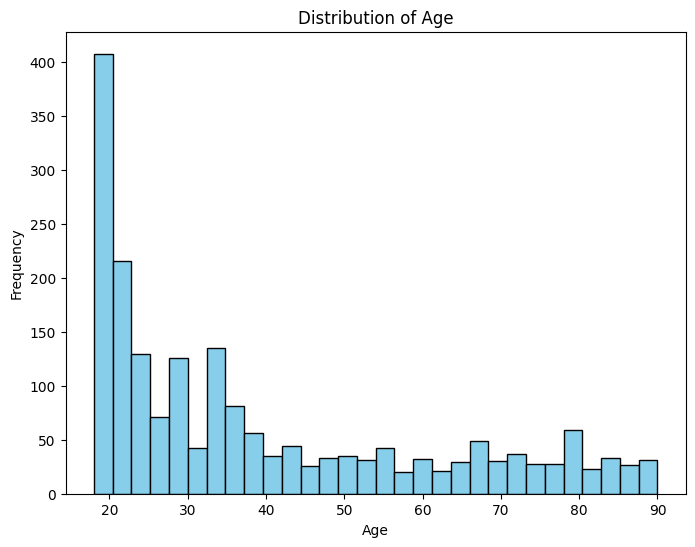

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [21]:
df['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


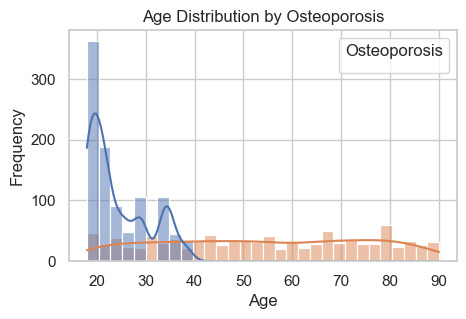

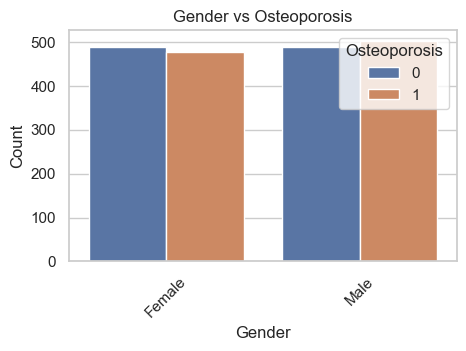

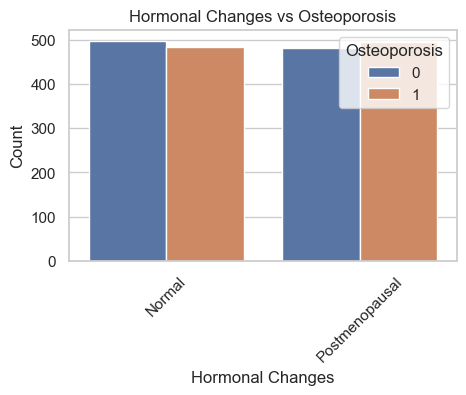

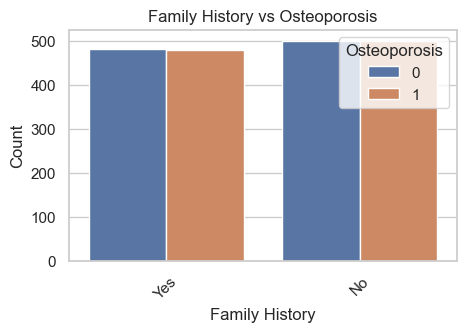

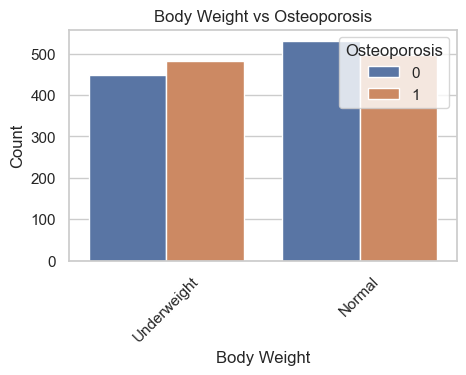

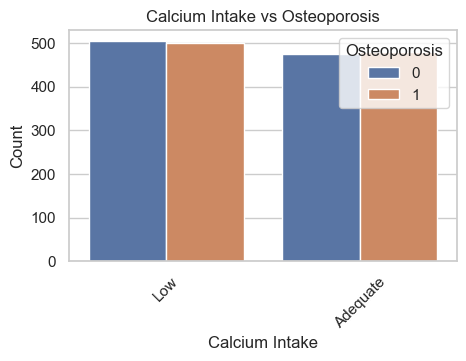

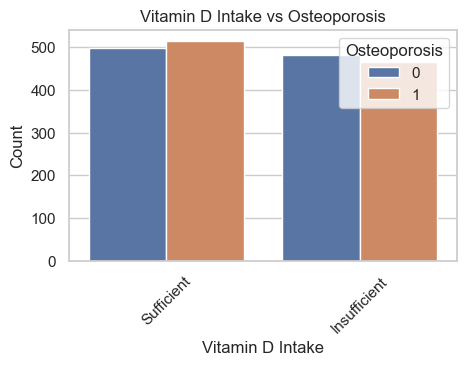

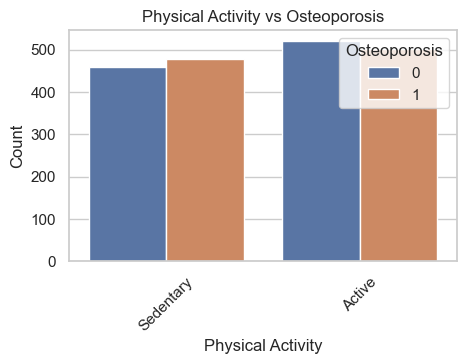

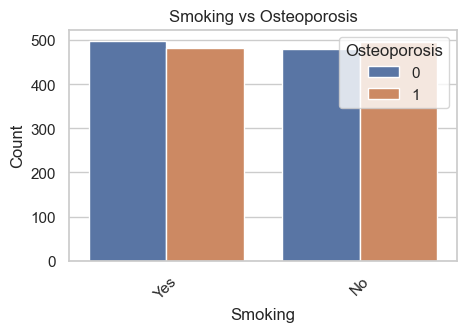

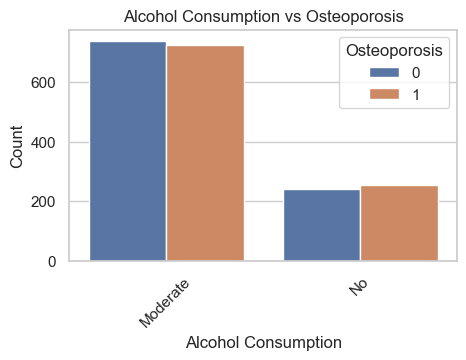

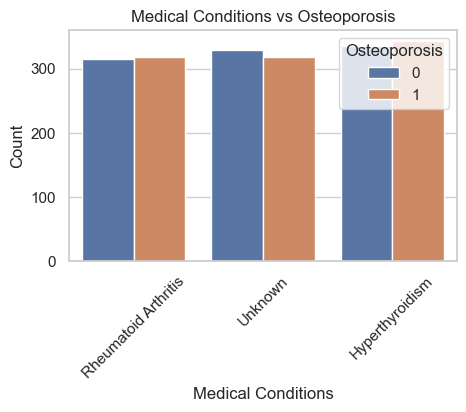

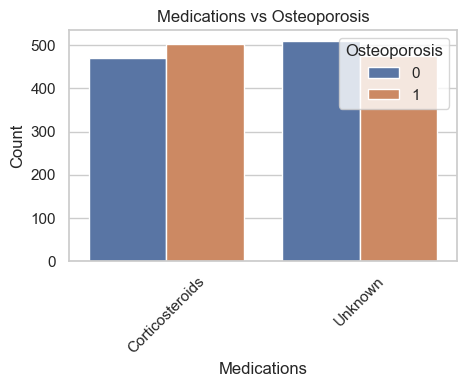

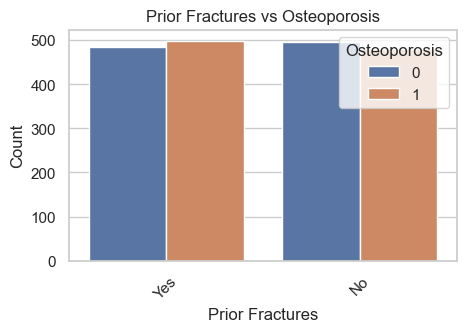

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a function to create plots
def plot_features(df, feature):
    plt.figure(figsize=(5, 3))
    if df[feature].dtype == 'object':
        sns.countplot(x=feature, hue='Osteoporosis', data=df)
        plt.title(f'{feature} vs Osteoporosis')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    else:
        sns.histplot(data=df, x=feature, hue='Osteoporosis', kde=True, bins=30)
        plt.title(f'{feature} Distribution by Osteoporosis')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.legend(title='Osteoporosis', loc='upper right')
    plt.show()

# Iterate over each column (excluding 'Id' and 'Osteoporosis')
for column in df.columns:
    if column not in ['Id', 'Osteoporosis']:
        plot_features(df, column)


In [23]:
# Find columns with non-numeric values
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)


In [24]:

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Id                                       1958 non-null   int64
 1   Age                                      1958 non-null   int64
 2   Osteoporosis                             1958 non-null   int64
 3   Gender_Female                            1958 non-null   bool 
 4   Gender_Male                              1958 non-null   bool 
 5   Hormonal Changes_Normal                  1958 non-null   bool 
 6   Hormonal Changes_Postmenopausal          1958 non-null   bool 
 7   Family History_No                        1958 non-null   bool 
 8   Family History_Yes                       1958 non-null   bool 
 9   Body Weight_Normal                       1958 non-null   bool 
 10  Body Weight_Underweight                  1958 non-null   bool 
 11  Calc

# trail 1 decision tree

Decision Tree Accuracy: 0.8435374149659864

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       285
           1       0.83      0.87      0.85       303

    accuracy                           0.84       588
   macro avg       0.84      0.84      0.84       588
weighted avg       0.84      0.84      0.84       588



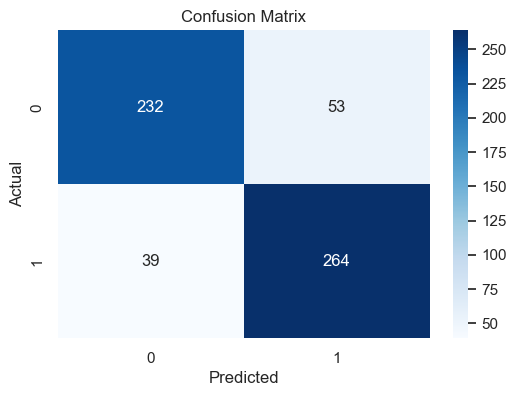


ROC-AUC Score: 0.8422094841063054


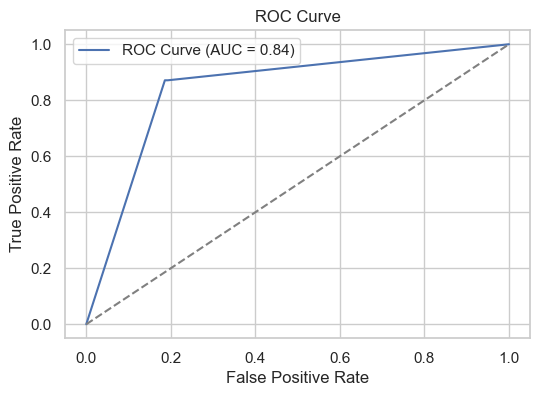

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score  # Added accuracy_score here
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("\nROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# trail 2 random forest

Random Forest Accuracy: 0.8367346938775511

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       285
           1       0.91      0.76      0.83       303

    accuracy                           0.84       588
   macro avg       0.84      0.84      0.84       588
weighted avg       0.85      0.84      0.84       588



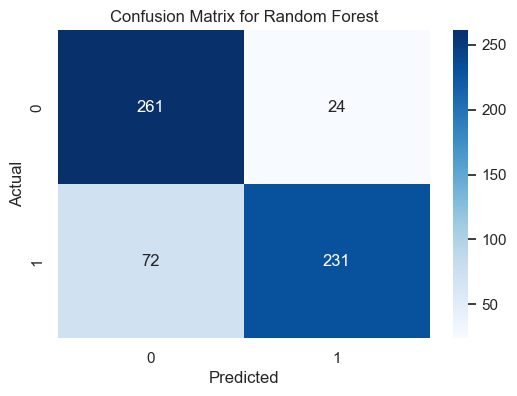


ROC-AUC Score for Random Forest: 0.8969775924960918


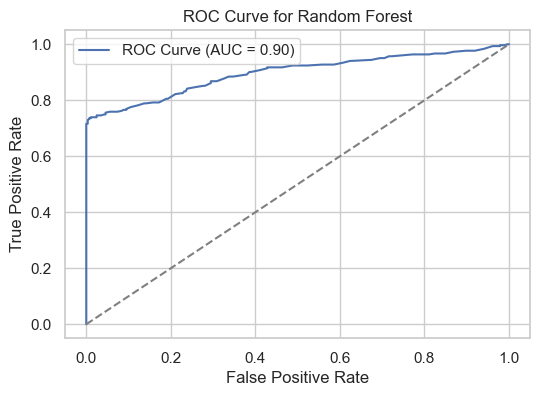

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
print("\nROC-AUC Score for Random Forest:", roc_auc_rf)

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

# trail 3 XGboost

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8758503401360545

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       285
           1       0.90      0.85      0.88       303

    accuracy                           0.88       588
   macro avg       0.88      0.88      0.88       588
weighted avg       0.88      0.88      0.88       588



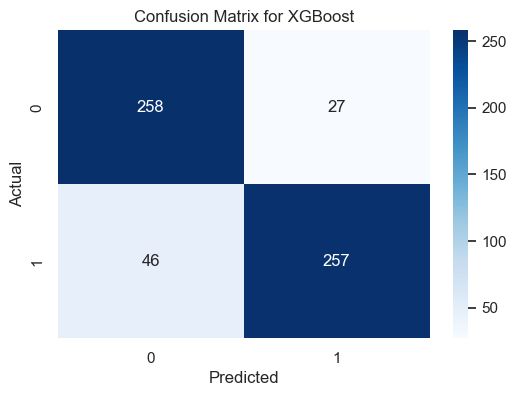


ROC-AUC Score for XGBoost: 0.9260610271553471


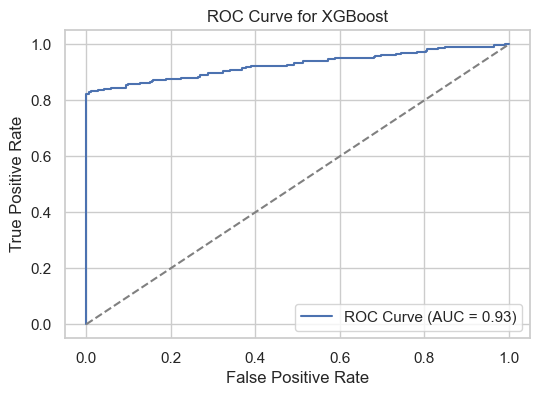

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming df_encoded is already prepared)
# If not, load your dataset here
# df = pd.read_csv("your_dataset.csv")

# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)
print("\nROC-AUC Score for XGBoost:", roc_auc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend()
plt.show()

# trail 4 KNN

KNN Accuracy: 0.8486394557823129

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       285
           1       0.91      0.78      0.84       303

    accuracy                           0.85       588
   macro avg       0.86      0.85      0.85       588
weighted avg       0.86      0.85      0.85       588



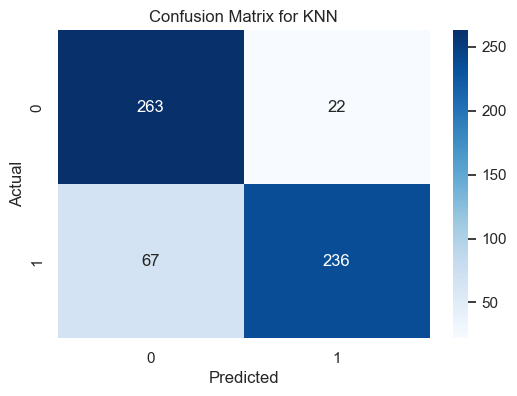


ROC-AUC Score for KNN: 0.8986277575125934


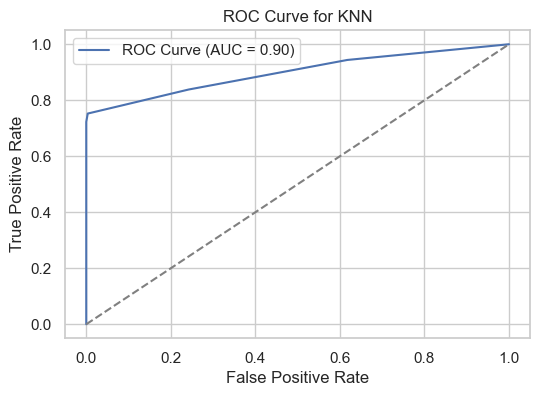

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)
print("\nROC-AUC Score for KNN:", roc_auc_knn)

# ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"ROC Curve (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend()
plt.show()

# trail 5 GBM

GBM Accuracy: 0.9217687074829932

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       285
           1       1.00      0.85      0.92       303

    accuracy                           0.92       588
   macro avg       0.93      0.92      0.92       588
weighted avg       0.93      0.92      0.92       588



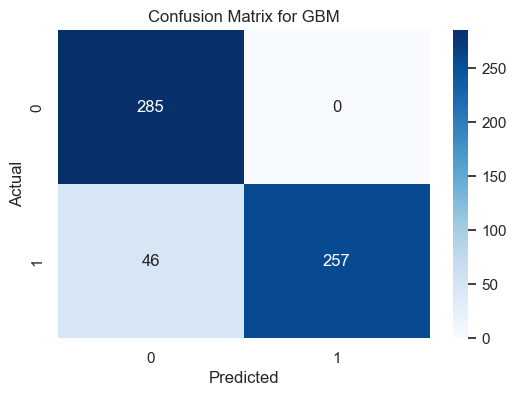


ROC-AUC Score for GBM: 0.9252967402003358


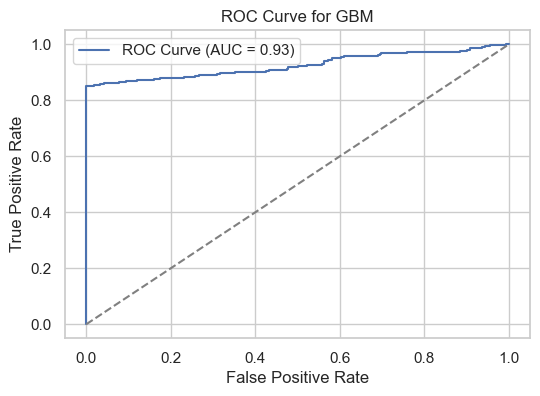

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate the accuracy of the GBM model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("GBM Accuracy:", accuracy_gbm)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm))

# Confusion Matrix
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for GBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_gbm = gbm_model.predict_proba(X_test)[:, 1]
roc_auc_gbm = roc_auc_score(y_test, y_probs_gbm)
print("\nROC-AUC Score for GBM:", roc_auc_gbm)

# ROC Curve
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_probs_gbm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_gbm, tpr_gbm, label=f"ROC Curve (AUC = {roc_auc_gbm:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for GBM")
plt.legend()
plt.show()

# trail 6 ada boost

AdaBoost Accuracy: 0.8690476190476191

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       285
           1       1.00      0.75      0.85       303

    accuracy                           0.87       588
   macro avg       0.89      0.87      0.87       588
weighted avg       0.90      0.87      0.87       588



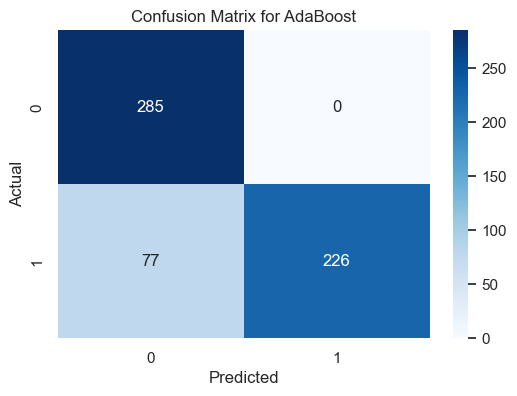


ROC-AUC Score for AdaBoost: 0.9144751317236985


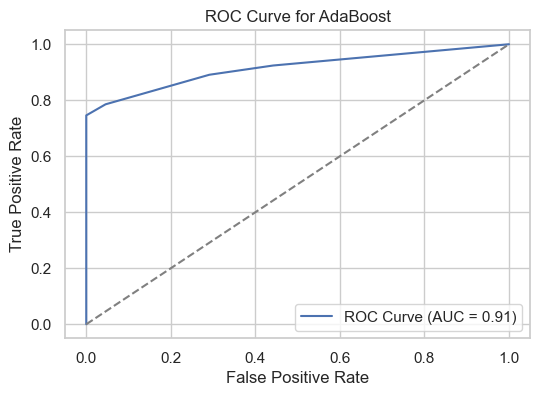

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model on the training set
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost))

# Confusion Matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
roc_auc_adaboost = roc_auc_score(y_test, y_probs_adaboost)
print("\nROC-AUC Score for AdaBoost:", roc_auc_adaboost)

# ROC Curve
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_probs_adaboost)
plt.figure(figsize=(6, 4))
plt.plot(fpr_adaboost, tpr_adaboost, label=f"ROC Curve (AUC = {roc_auc_adaboost:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for AdaBoost")
plt.legend()
plt.show()

# trail 7 naivebayes

Naive Bayes Accuracy: 0.8418367346938775

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       285
           1       0.91      0.77      0.83       303

    accuracy                           0.84       588
   macro avg       0.85      0.84      0.84       588
weighted avg       0.85      0.84      0.84       588



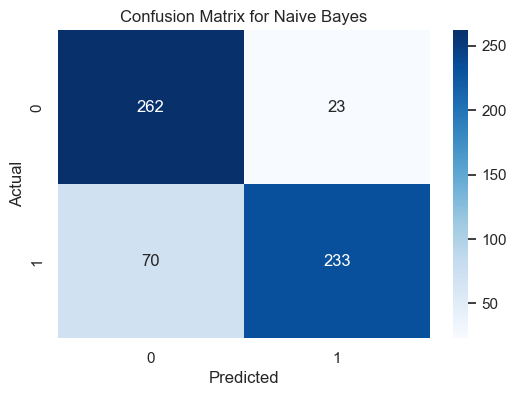


ROC-AUC Score for Naive Bayes: 0.9003879335301951


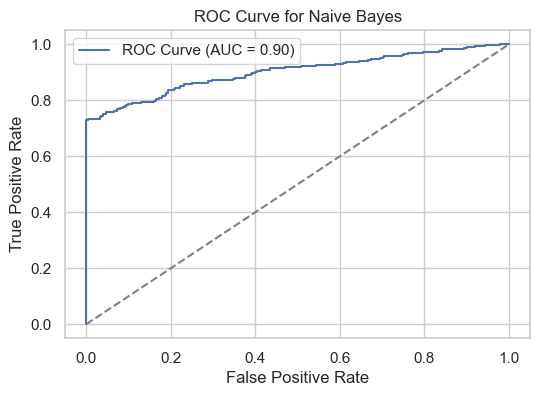

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_nb = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)
print("\nROC-AUC Score for Naive Bayes:", roc_auc_nb)

# ROC Curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f"ROC Curve (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.legend()
plt.show()

# trail 8 svm

SVM Accuracy: 0.8452380952380952

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       285
           1       0.95      0.74      0.83       303

    accuracy                           0.85       588
   macro avg       0.86      0.85      0.84       588
weighted avg       0.86      0.85      0.84       588



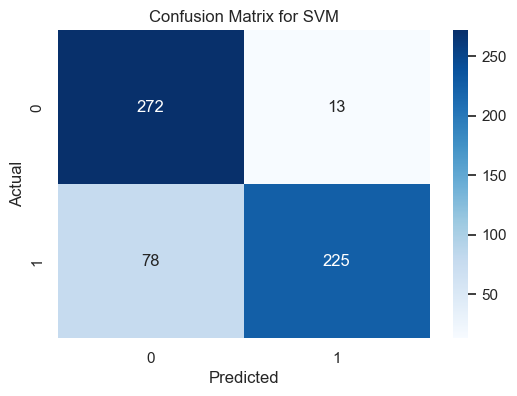


ROC-AUC Score for SVM: 0.8989404203578254


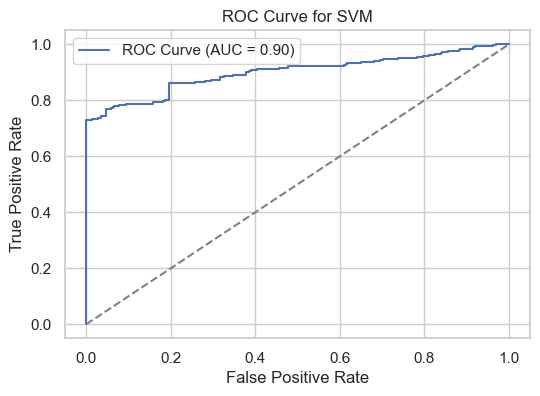

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier (SVC) model
svm_model = SVC(probability=True, random_state=42)  # Set probability=True to enable probability estimates

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)
print("\nROC-AUC Score for SVM:", roc_auc_svm)

# ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"ROC Curve (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()

# trail 9 extra trees

ExtraTrees Accuracy: 0.7908163265306123

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       285
           1       0.81      0.77      0.79       303

    accuracy                           0.79       588
   macro avg       0.79      0.79      0.79       588
weighted avg       0.79      0.79      0.79       588



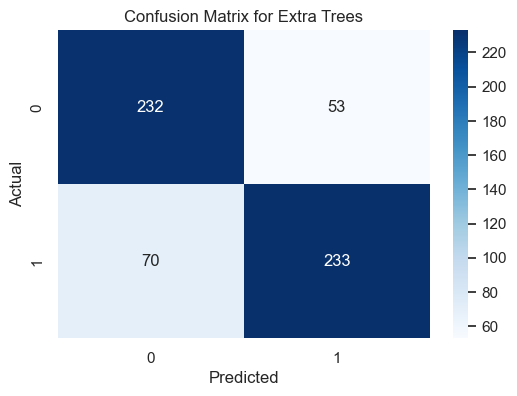


ROC-AUC Score for Extra Trees: 0.8455387644027561


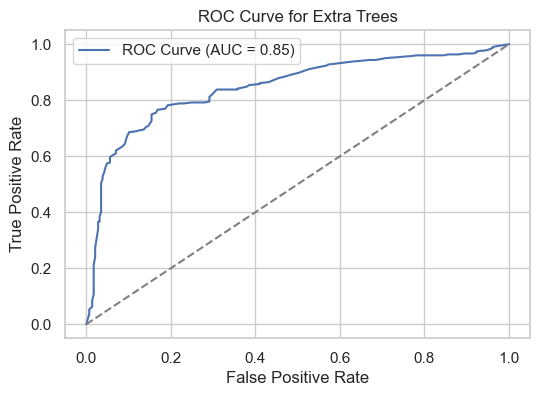

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Train the model on the training set
extra_trees_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_extra_trees = extra_trees_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("ExtraTrees Accuracy:", accuracy_extra_trees)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_extra_trees))

# Confusion Matrix
cm_extra_trees = confusion_matrix(y_test, y_pred_extra_trees)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_extra_trees, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Extra Trees")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_extra_trees = extra_trees_model.predict_proba(X_test)[:, 1]
roc_auc_extra_trees = roc_auc_score(y_test, y_probs_extra_trees)
print("\nROC-AUC Score for Extra Trees:", roc_auc_extra_trees)

# ROC Curve
fpr_extra_trees, tpr_extra_trees, thresholds_extra_trees = roc_curve(y_test, y_probs_extra_trees)
plt.figure(figsize=(6, 4))
plt.plot(fpr_extra_trees, tpr_extra_trees, label=f"ROC Curve (AUC = {roc_auc_extra_trees:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Extra Trees")
plt.legend()
plt.show()

# trail 10 stacking classifier

Stacking Classifier Accuracy: 0.8673469387755102

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       285
           1       0.90      0.84      0.87       303

    accuracy                           0.87       588
   macro avg       0.87      0.87      0.87       588
weighted avg       0.87      0.87      0.87       588



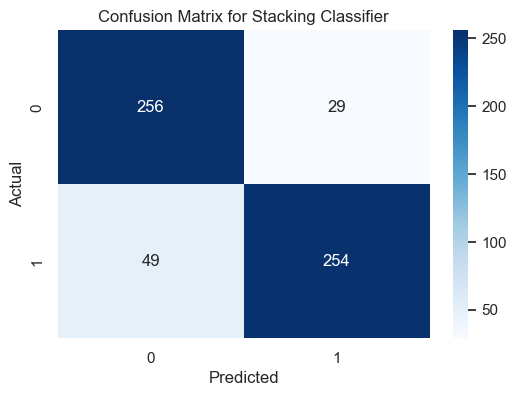


ROC-AUC Score for Stacking Classifier: 0.9157952637368999


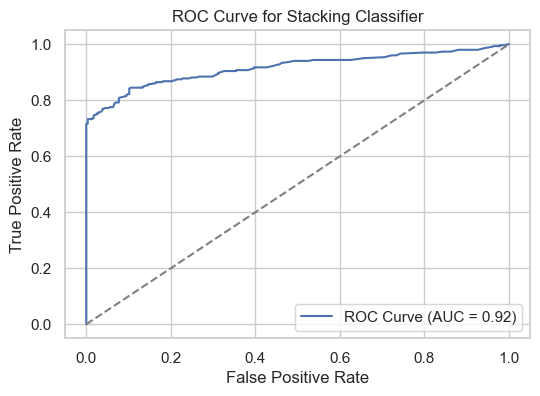

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Correct import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))  # Correctly imported
]

# Define the meta classifier
meta_classifier = LogisticRegression()

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = stacking_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_stacking = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_stacking = stacking_classifier.predict_proba(X_test)[:, 1]
roc_auc_stacking = roc_auc_score(y_test, y_probs_stacking)
print("\nROC-AUC Score for Stacking Classifier:", roc_auc_stacking)

# ROC Curve
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_probs_stacking)
plt.figure(figsize=(6, 4))
plt.plot(fpr_stacking, tpr_stacking, label=f"ROC Curve (AUC = {roc_auc_stacking:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Stacking Classifier")
plt.legend()
plt.show()

# trail 11 bagging classifier

Bagging Classifier Accuracy: 0.8979591836734694

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       285
           1       0.95      0.84      0.90       303

    accuracy                           0.90       588
   macro avg       0.90      0.90      0.90       588
weighted avg       0.90      0.90      0.90       588



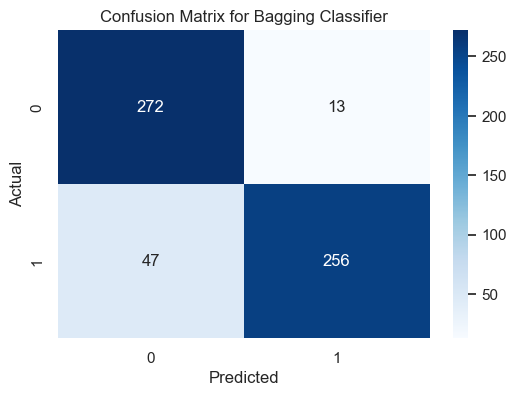


ROC-AUC Score for Bagging Classifier: 0.92525041977882


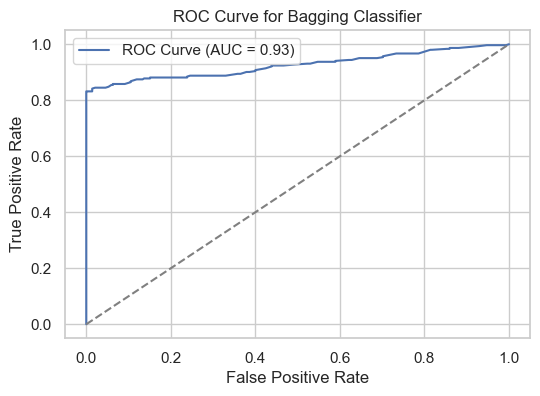

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define features and target variable
X = df_encoded.drop(columns=['Id', 'Osteoporosis'])
y = df_encoded['Osteoporosis']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bagging_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Bagging Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Score
# For binary classification, get predicted probabilities for the positive class
y_probs_bagging = bagging_classifier.predict_proba(X_test)[:, 1]
roc_auc_bagging = roc_auc_score(y_test, y_probs_bagging)
print("\nROC-AUC Score for Bagging Classifier:", roc_auc_bagging)

# ROC Curve
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_probs_bagging)
plt.figure(figsize=(6, 4))
plt.plot(fpr_bagging, tpr_bagging, label=f"ROC Curve (AUC = {roc_auc_bagging:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Bagging Classifier")
plt.legend()
plt.show()

In [45]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 2: Load and Preprocess the Data
df = pd.read_csv("osteoporosis.csv")  # Load your dataset
# Assume df is preprocessed and cleaned as per your previous steps
X = df.drop(columns=['Id', 'Osteoporosis'])  # Features
y = df['Osteoporosis']  # Target variable

# Print all column names for debugging
print("Columns in dataset:", df.columns.tolist())

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Step 3: Create a Column Transformer for Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical variables
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Step 4: Define the Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Stacking Classifier": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ], final_estimator=LogisticRegression()),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
}
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Columns in dataset: ['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis']
Categorical columns: ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


In [46]:

# Step 5: Train and Evaluate Each Model
results = {}

for model_name, model in models.items():
    # Create a pipeline that first transforms the data and then fits the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Step 6: Compare Results and Select the Best Model
results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)

# Identify the best model based on ROC AUC
best_model_name = results_df['ROC AUC'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(best_model_metrics)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:04:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                        Accuracy  Precision    Recall  F1 Score   ROC AUC
Decision Tree           0.811224   0.811224  0.811224  0.811224  0.811224
Random Forest           0.829082   0.932886  0.709184  0.805797  0.871577
Gradient Boosting       0.880102   0.986928  0.770408  0.865330  0.888744
XGBoost                 0.859694   0.922156  0.785714  0.848485  0.888094
K-Nearest Neighbors     0.829082   0.916129  0.724490  0.809117  0.876822
AdaBoost                0.839286   1.000000  0.678571  0.808511  0.889942
Naive Bayes             0.811224   0.886076  0.714286  0.790960  0.870314
Support Vector Machine  0.829082   0.957447  0.688776  0.801187  0.869872
Extra Trees             0.785714   0.818182  0.734694  0.774194  0.848149
Stacking Classifier     0.823980   0.850829  0.785714  0.816976  0.882588
Bagging Classifier      0.875000   0.968153  0.775510  0.861190  0.895708

Best Model: Bagging Classifier
Accuracy     0.875000
Precision    0.968153
Recall       0.775510
F1 Score     0